In [9]:
# importing necessary package

import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

# importing modules from source

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
import src.loader as loader
from datetime import datetime, timedelta

In [2]:
# Data acquisition
# we use slack data

data_loader = SlackDataLoader("C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized")
path_channel = "C:/Users/Diriba/Desktop/10AC/Projects/week0_starter_network_analysis/anonymized"
df = data_loader.slack_parser(path_channel)

df.head(10)

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel_name,channel
0,message,<https://towardsdatascience.com/how-to-fill-mi...,Anthony Galloway,1661158502.784099,link,0,0,0,0,0,all-week1,anonymized
1,message,"Imputation Using k-NN, Imputation Using Multiv...",Katie Dickerson,1661158692.172369,text,1661158692.172369,2,2,"U03U1GHT39V,U03UJGRN5E0",1661159006.632649,all-week1,anonymized
2,message,<https://towardsdatascience.com/6-different-wa...,Katie Dickerson,1661158702.777369,link,0,0,0,0,0,all-week1,anonymized
3,message,u can use SMOTE or mode to impute categorical ...,Joseph Diaz,1661158767.626859,text,1661158692.172369,0,0,0,0,all-week1,anonymized
4,message,:+1:thanks,Katie Dickerson,1661159006.632649,emoji,1661158692.172369,0,0,0,0,all-week1,anonymized
5,message,<https://www.scribbr.com/statistics/normal-dis...,Amy Leon,1661160070.855719,link,1661160070.855719,1,1,U03UFV7TUTV,1661161916.102399,all-week1,anonymized
6,message,"Any have information, on the time the next ses...",Nancy Craig,1661161636.759979,text,1661161636.759979,5,4,"U03U93GNNVB,U03U1FNPEUX,U03UG5VFN03,U03UG0YHAUT",1661170044.469879,all-week1,anonymized
7,message,Please check the schedule,Katherine Foster,1661161669.054589,text,1661161636.759979,0,0,0,0,all-week1,anonymized
8,message,<https://www.notion.so/10academy/10-Academy-Ba...,Joshua Rhodes,1661161725.970779,link,1661161636.759979,0,0,0,0,all-week1,anonymized
9,message,Thanks Natnael,Anthony Galloway,1661161916.102399,text,1661160070.855719,0,0,0,0,all-week1,anonymized


In [3]:
'''Who are the top and bottom 10 users by
■ Reply count?
■ Mention?
■ Message count?
■ Reaction count?
'''


# Convert 'reply_users' column to a list of users
df['reply_users'] = df['reply_users'].apply(lambda x: x.split(',') if x else [])

# Create new columns for counts
df['reply_count'] = df['reply_count'].astype(int)
df['mention_count'] = df['reply_users'].apply(len)
df['reaction_count'] = df['msg_content'].apply(lambda x: x.count(':') // 2 if isinstance(x, str) else 0)
df['message_count'] = 1  # for each row

# Aggregate data by user
user_stats = df.groupby('sender_name').agg({
    'reply_count': 'sum',
    'mention_count': 'sum',
    'reaction_count': 'sum',
    'message_count': 'sum'
}).reset_index()

# Top and bottom 10 users by different metrics
top10_reply_count = user_stats.nlargest(10, 'reply_count')
bottom10_reply_count = user_stats.nsmallest(10, 'reply_count')

top10_mention_count = user_stats.nlargest(10, 'mention_count')
bottom10_mention_count = user_stats.nsmallest(10, 'mention_count')

top10_message_count = user_stats.nlargest(10, 'message_count')
bottom10_message_count = user_stats.nsmallest(10, 'message_count')

top10_reaction_count = user_stats.nlargest(10, 'reaction_count')
bottom10_reaction_count = user_stats.nsmallest(10, 'reaction_count')

# Display the results
print("Top 10 Users by Reply Count:")
print(top10_reply_count[['sender_name', 'reply_count']])
print("\nBottom 10 Users by Reply Count:")
print(bottom10_reply_count[['sender_name', 'reply_count']])

print("\nTop 10 Users by Mention Count:")
print(top10_mention_count[['sender_name', 'mention_count']])
print("\nBottom 10 Users by Mention Count:")
print(bottom10_mention_count[['sender_name', 'mention_count']])

print("\nTop 10 Users by Message Count:")
print(top10_message_count[['sender_name', 'message_count']])
print("\nBottom 10 Users by Message Count:")
print(bottom10_message_count[['sender_name', 'message_count']])

print("\nTop 10 Users by Reaction Count:")
print(top10_reaction_count[['sender_name', 'reaction_count']])
print("\nBottom 10 Users by Reaction Count:")
print(bottom10_reaction_count[['sender_name', 'reaction_count']])


Top 10 Users by Reply Count:
         sender_name  reply_count
13   Cristian Wilson          362
7   Brenda Hernandez          197
38    Michelle Lewis          192
26     Joshua Rhodes           86
29   Katie Dickerson           85
5    Ashley Hamilton           81
6       Brady Rhodes           74
30        Kelly Soto           65
8         Brian Odom           59
19        Eric Myers           53

Bottom 10 Users by Reply Count:
          sender_name  reply_count
0    Allison Thompson            0
11       Carol Kaiser            0
15        David Scott            0
31        Leah Newton            0
32        Luis Ingram            0
35     Melissa Ingram            0
42    Patricia Thomas            0
43  Patrick Hernandez            0
47      Robert Carter            0
48       Samantha Lee            0

Top 10 Users by Mention Count:
         sender_name  mention_count
13   Cristian Wilson            158
38    Michelle Lewis            115
7   Brenda Hernandez            106
29 

In [5]:
'''What are the top 10 messages by
■ Replies?
■ Reactions?
■ Mentions?

'''


# Convert 'reply_users' column to a list of users
df['reply_users'] = df['reply_users'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Create new columns for counts
df['reply_count'] = df['reply_count'].astype(int)
df['mention_count'] = df['reply_users'].apply(len)
df['reaction_count'] = df['msg_content'].apply(lambda x: x.count(':') // 2 if isinstance(x, str) else 0)

# Top 10 messages by replies
top10_messages_by_replies = df.nlargest(10, 'reply_count')

# Top 10 messages by reactions
top10_messages_by_reactions = df.nlargest(10, 'reaction_count')

# Top 10 messages by mentions
top10_messages_by_mentions = df.nlargest(10, 'mention_count')

# Display the results
print("Top 10 Messages by Replies:")
print(top10_messages_by_replies[['msg_content', 'reply_count']])

print("\nTop 10 Messages by Reactions:")
print(top10_messages_by_reactions[['msg_content', 'reaction_count']])

print("\nTop 10 Messages by Mentions:")
print(top10_messages_by_mentions[['msg_content', 'mention_count']])


Top 10 Messages by Replies:
                                            msg_content  reply_count
2969  1. How do I find my jupyter notebook file in m...           61
619   <@U03UUR571A5> Solutions to funding account an...           44
1191  I was working from the local machine,  path = ...           30
959                             What does the error say           27
1073  Hey, I am really upset from the provided resou...           24
1463  how to used the version of my data in gdrive i...           21
2439  I am getting\n```docker.errors.DockerException...           21
2224  Hello, community .As I hear this advice from 1...           19
394   I need some one who understood task two to ask...           18
3237  How could I join the two tables? do they have ...           18

Top 10 Messages by Reactions:
                                            msg_content  reaction_count
960   ```Traceback (most recent call last):\n  File ...              12
2277  <!here>, aws instance is being s

Channel with the highest activity: anonymized


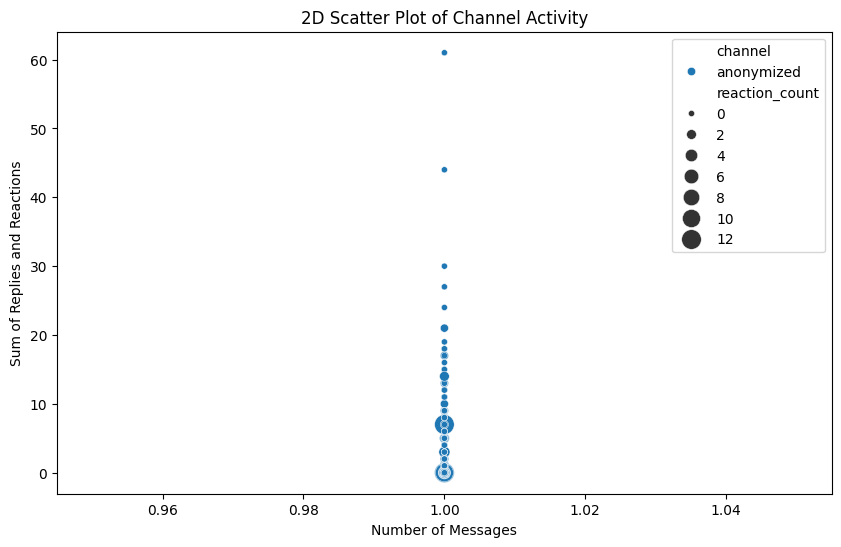

In [8]:
#  Which channel has the highest activity?


# Aggregate data by channel
channel_activity = df.groupby('channel').agg({
    'message_count': 'sum',
    'reply_count': 'sum',
    'reaction_count': 'sum'
}).reset_index()

# Calculate the total activity as the sum of message count, reply count, and reaction count
channel_activity['total_activity'] = channel_activity['message_count'] + channel_activity['reply_count'] + channel_activity['reaction_count']

# Find the channel with the highest total activity
most_active_channel = channel_activity.loc[channel_activity['total_activity'].idxmax()]

print("Channel with the highest activity:", most_active_channel['channel'])

# Plot a 2D scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    x='message_count',
    y='reply_count',
    hue='channel',
    size='reaction_count',
    sizes=(20, 200),
    data=df
)

# Identify the channel with the highest total activity and annotate it
plt.annotate(
    f"Most Active Channel: {most_active_channel['channel']}",
    xy=(most_active_channel['message_count'], most_active_channel['reply_count']),
    xytext=(most_active_channel['message_count'] + 500, most_active_channel['reply_count'] + 500),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
)

plt.title('2D Scatter Plot of Channel Activity')
plt.xlabel('Number of Messages')
plt.ylabel('Sum of Replies and Reactions')
plt.show()


Fraction of messages replied within the first 5 minutes: 89.77%


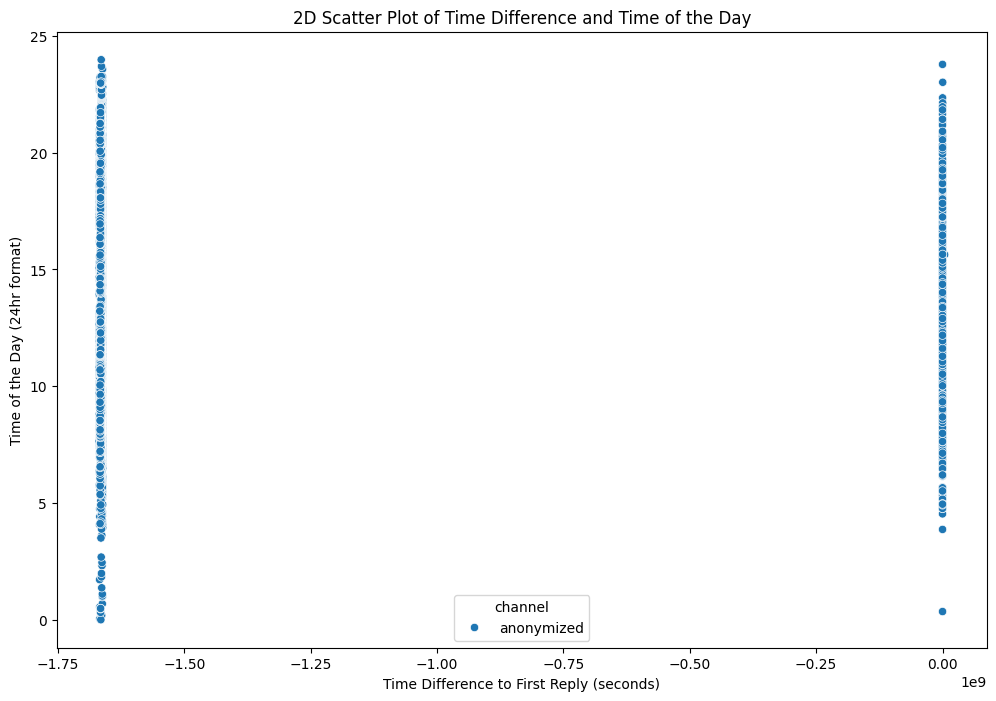

In [7]:
# What fraction of messages are replied within the first 5mins?

# Convert 'msg_sent_time' and 'tm_thread_end' columns to datetime objects
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')
df['tm_thread_end'] = pd.to_datetime(df['tm_thread_end'], unit='s')

# Calculate the time difference between the message timestamp and the first reply message
df['time_to_first_reply'] = (df['tm_thread_end'] - df['msg_sent_time']).dt.total_seconds()

# Calculate the time of the day in 24hr format
df['time_of_day'] = df['msg_sent_time'].dt.hour + df['msg_sent_time'].dt.minute / 60

# Calculate the fraction of messages replied within the first 5 minutes
fraction_replied_within_5mins = (df['time_to_first_reply'] <= 300).sum() / len(df)

print(f"Fraction of messages replied within the first 5 minutes: {fraction_replied_within_5mins:.2%}")

# Plot a 2D scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='time_to_first_reply',
    y='time_of_day',
    hue='channel',
    data=df
)

plt.title('2D Scatter Plot of Time Difference and Time of the Day')
plt.xlabel('Time Difference to First Reply (seconds)')
plt.ylabel('Time of the Day (24hr format)')
plt.show()
